# 项目背景及目的

本项目采用天池阿里公开数据集 Baby Goods Info Data。  
其中包含数据预处理、数据分析、数据挖掘三大模块，所有想法基于数据集特征临时想出，可能有些许不足，旨在锻炼小组成员数据分析与协作完成完整项目等能力。   
- 数据预处理模块：对原始数据集进行数据清洗、特征处理、表的连接等操作。
（在数据分析与数据挖掘模块含有相应的特征表构建等数据处理操作，不纳入数据预处理模块）
- 数据分析模块：以数据处理得到的表格为基准进行可视化分析并得出结论，针对网购销售方面制定营销策略等。
- 数据挖掘模块：尝试使用多种机器学习分类算法对诸如孩子性别等特征进行预测，训练出相应分类器以便更好地划分客户，进行个性化推送等精准营销手段。

In [1]:
#导入第三方库
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time

# 数据预处理

本项目的数据集为天池阿里公开数据集 Baby Goods Info Data。  
包含两个csv文件：  
- (sample)sam_tianchi_mum_baby.csv  
包含了消费者在淘宝或天猫提供的900多个孩子的生日和性别。   
- (sample)sam_tianchi_mum_baby_trade_history.csv  
该表包含淘宝会员的历史交易信息。

由于源数据集丢失，采用样本数据集进行研究，但为了对于千万量级的源数据集仍然有较好的运行效果，本项目全程选用python编程语言进行数据分析与挖掘等。
除了数据量级的不同以及运行时间快慢问题，与其并无不同

In [2]:
#数据读取
file_path1=r'(sample)sam_tianchi_mum_baby_trade_history.csv '
data1=pd.read_csv(file_path1)
data1

,user_id,auction_id,cat_id,cat1,property,buy_mount,day
0,786295544,41098319944,50014866,50022520,21458:86755362;13023209:3593274;10984217:21985...,2,20140919
1,532110457,17916191097,50011993,28,21458:11399317;1628862:3251296;21475:137325;16...,1,20131011
2,249013725,21896936223,50012461,50014815,21458:30992;1628665:92012;1628665:3233938;1628...,1,20131011
3,917056007,12515996043,50018831,50014815,21458:15841995;21956:3494076;27000458:59723383...,2,20141023
4,444069173,20487688075,50013636,50008168,21458:30992;13658074:3323064;1628665:3233941;1...,1,20141103
...,...,...,...,...,...,...,...
29966,57747284,35169635909,50010549,50008168,21458:125202070;22019:3228688;22019:3248884;22...,1,20140109
29967,287541325,19778523000,50007011,50008168,21458:112788583;1633959:3523439;3130834:209537...,2,20140109
29968,82915321,12766532512,50011993,28,21475:137325;1628665:3233937;1628665:29798;162...,1,20131008
29969,78259523,18309305134,50013711,50008168,21458:30992;1628665:29778;1628665:29793;163395...,1,20131008


In [3]:
file_path2=r'(sample)sam_tianchi_mum_baby.csv '
data2=pd.read_csv(file_path2)
data2

,user_id,birthday,gender
0,2757,20130311,1
1,415971,20121111,0
2,1372572,20120130,1
3,10339332,20110910,0
4,10642245,20130213,0
...,...,...,...
948,2020957900,20140430,0
949,2080304899,20100713,0
950,2114469016,20140416,0
951,2186831536,20140519,1


In [6]:
#数据读取
file_path1=r'(sample)sam_tianchi_mum_baby_trade_history.csv '
data1=pd.read_csv(file_path1)
# data1.head()
data1.columns = ['用户ID','订单编号','商品ID','根类别ID','特征','购买数量','时间戳']
data1=data1[['用户ID','订单编号','商品ID','根类别ID','购买数量','时间戳']]
#时间戳转换格式
data1['时间戳']=pd.to_datetime(data1['时间戳'].astype(str))
data1.head()

,用户ID,订单编号,商品ID,根类别ID,购买数量,时间戳
0,786295544,41098319944,50014866,50022520,2,2014-09-19
1,532110457,17916191097,50011993,28,1,2013-10-11
2,249013725,21896936223,50012461,50014815,1,2013-10-11
3,917056007,12515996043,50018831,50014815,2,2014-10-23
4,444069173,20487688075,50013636,50008168,1,2014-11-03


- user_id：用户ID，具有唯一性，用来识别购买用户，一个用户ID代表一个用户；  

- auction_id：购买行为编号，也可以理解为订单编号，一次交易成交或者交易关闭都是一个购买行为编号；  

- cat_id：商品种类ID，比如【母婴】下面有【童装】这个大类，【童装】类目下有【儿童外套】这个品类，然后每一款商品都对应唯一的商品种类ID；  

- cat1：商品是属于哪个种类，比如一款幼童夹克外套是属于童装这个大类的；  

- property：商品属性或者说商品参数，比如一款幼童夹克外套的商品参数有，品牌方面：ZARA；适用年龄：12个月 18个月 2岁；图案：纯色；风格：休闲等等；（已去除）  

- buy_mount：购买数量，也可以说这个订单里有几件商品；  

- day：购买时间，就是用户在哪个时间点付款完成；  


In [7]:
data2.columns = ['用户ID','出生日期','性别']
#出生日期转换格式
data2['出生日期']=pd.to_datetime(data2['出生日期'].astype(str))
data2["性别"].replace(1, "男", inplace=True)
data2["性别"].replace(0, "女", inplace=True)
data2["性别"].replace(2, "未知", inplace=True)
data2.head()

,用户ID,出生日期,性别
0,2757,2013-03-11,男
1,415971,2012-11-11,女
2,1372572,2012-01-30,男
3,10339332,2011-09-10,女
4,10642245,2013-02-13,女


- user_id：用户id，具有唯一性，用来识别购买用户，一个用户ID代表一个用户；

- birthday：出生日期，用户对应填写的婴儿出生日期，可以从购买时间来算出婴儿实际年龄；

- gender：性别（0 男性；1 女性）；

### 一、数据读取和数据清洗

In [8]:
# 1.检查空值 ---检查结果数据无空值
# data1.info()
data1.isnull().sum()
data2.isnull().sum()

用户ID    0
出生日期    0
性别      0
dtype: int64

In [9]:
# 2.检查异常值

# 1）检查时间戳是否存在异常值
print(data1[data1["时间戳"]>'2019-1-1'])

# 2）检查购买数量是否存在异常值
# print(data1["购买数量"].value_counts())
# print(data1[data1["购买数量"]>1000])
# 1
#将购买数量超过1000的数据视作异常值
c_data1=data1[data1["购买数量"]<=1000]

# 3）检查出生日期是否存在异常值
# print(data1["时间戳"].min())
#将出生日期早于2000.07.02与晚于2018.12.31的婴儿数据视为异常值
print(data2[(data2["出生日期"]<'20000702')|(data2["出生日期"]>'20181231')])
c_data2=data2[(data2["出生日期"]<='20181231')&(data2["出生日期"]>='20000702')]

# 3）检查性别是否存在异常值
print(data2["性别"].value_counts())
# 未知性别暂不处理

# 4）检查异常处理结果
print(c_data1[c_data1["购买数量"]>1000].value_counts())
print(c_data2[(c_data2["出生日期"]<'20000702')|(c_data2["出生日期"]>'20001231')].value_counts())
print(c_data2["性别"].value_counts())
# print(data1.info())  
# data1.head()

Empty DataFrame
Columns: [用户ID, 订单编号, 商品ID, 根类别ID, 购买数量, 时间戳]
Index: []
        用户ID       出生日期 性别
97  89520261 1984-06-16  女
女     489
男     438
未知     26
Name: 性别, dtype: int64
Series([], dtype: int64)
用户ID        出生日期        性别
2757        2013-03-11  男     1
606918860   2012-06-27  女     1
559247716   2012-10-20  男     1
571159301   2011-07-20  男     1
573822792   2014-12-26  女     1
                             ..
114558810   2008-09-14  女     1
115248467   2013-04-18  男     1
115378612   2014-04-12  未知    1
115930791   2013-05-19  女     1
2391404843  2014-09-16  男     1
Length: 952, dtype: int64
女     488
男     438
未知     26
Name: 性别, dtype: int64


In [10]:
# 4.去除重复数据
c_data1[c_data1.duplicated()]
c_data2[c_data2.duplicated()]
# print(cleaned_data.duplicated().value_counts())
# cleaned_data=cleaned_data.drop_duplicates(subset=['用户ID','商品ID','商品类目ID','行为类型','时间戳'],keep='first')
# print(cleaned_data.duplicated().value_counts())


,用户ID,出生日期,性别


In [17]:
# 5.预处理数据保存
# c_data1.to_csv(r'./cleaned_data_tarde.csv', encoding = 'utf-8', index = False)
# c_data2.to_csv(r'./cleaned_data_baby.csv', encoding = 'utf-8', index = False)
print(c_data1.duplicated().value_counts())


False    29967
dtype: int64


In [18]:
#处理后订单表
c_data1

,用户ID,订单编号,商品ID,根类别ID,购买数量,时间戳
0,786295544,41098319944,50014866,50022520,2,2014-09-19
1,532110457,17916191097,50011993,28,1,2013-10-11
2,249013725,21896936223,50012461,50014815,1,2013-10-11
3,917056007,12515996043,50018831,50014815,2,2014-10-23
4,444069173,20487688075,50013636,50008168,1,2014-11-03
...,...,...,...,...,...,...
29966,57747284,35169635909,50010549,50008168,1,2014-01-09
29967,287541325,19778523000,50007011,50008168,2,2014-01-09
29968,82915321,12766532512,50011993,28,1,2013-10-08
29969,78259523,18309305134,50013711,50008168,1,2013-10-08


In [19]:
#处理后孩子信息表
c_data2

,用户ID,出生日期,性别
0,2757,2013-03-11,男
1,415971,2012-11-11,女
2,1372572,2012-01-30,男
3,10339332,2011-09-10,女
4,10642245,2013-02-13,女
...,...,...,...
948,2020957900,2014-04-30,女
949,2080304899,2010-07-13,女
950,2114469016,2014-04-16,女
951,2186831536,2014-05-19,男


# 数据分析

## 连接表预处理

In [20]:
# 数据读取
file_path1 =r"./cleaned_data_tarde.csv"
file_path2 =r"./cleaned_data_baby.csv"
df_left=pd.read_csv(file_path1)
df_right=pd.read_csv(file_path2)

In [21]:
# 表按用户ID连接
df = pd.merge(df_left,df_right)
df.columns=['用户ID','订单编号','商品ID','根类别ID','购买数量','时间戳','孩子出生日期','孩子性别']
df['时间戳']=pd.to_datetime(df['时间戳'].astype(str))
df['孩子出生日期']=pd.to_datetime(df['孩子出生日期'].astype(str))
df['孩子年龄']=round((df['时间戳']-df['孩子出生日期'])/pd.Timedelta(days=365),2)

In [22]:
# 一、数据清洗
# 去掉未知孩子性别的数据
df=df[df['孩子性别']!='未知']

#去掉孩子出生日期晚于购买时间的数据
df=df[df['孩子年龄']>=0]
df

,用户ID,订单编号,商品ID,根类别ID,购买数量,时间戳,孩子出生日期,孩子性别,孩子年龄
0,513441334,19909384116,50010557,50008168,1,2012-12-12,2011-01-05,男,1.94
1,377550424,15771663914,50015841,28,1,2012-11-23,2011-06-20,男,1.43
2,47342027,14066344263,50013636,50008168,1,2012-09-11,2010-10-08,男,1.93
3,119784861,20796936076,50140021,50008168,1,2012-11-29,2012-03-27,女,0.68
4,159129426,15198386301,50013711,50008168,2,2012-08-08,2010-08-25,女,1.96
...,...,...,...,...,...,...,...,...,...
950,685332320,12781785338,50018831,50014815,2,2013-06-01,2012-02-23,女,1.27
951,389326420,17164967407,50006820,28,1,2014-09-16,2013-07-17,女,1.17
952,359840716,17513925908,50013207,50008168,1,2013-03-18,2009-01-20,女,4.16
953,1372572,16915013171,50008845,28,1,2013-03-27,2012-01-30,男,1.16


In [23]:
# 连接表预处理数据保存
# df.to_csv('cleaned_data.csv',index=False)

### 读取数据

In [24]:
####
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
file_path =r"./cleaned_data_tarde.csv"
df1=pd.read_csv(file_path)
df1

,用户ID,订单编号,商品ID,根类别ID,购买数量,时间戳
0,786295544,41098319944,50014866,50022520,2,2014-09-19
1,532110457,17916191097,50011993,28,1,2013-10-11
2,249013725,21896936223,50012461,50014815,1,2013-10-11
3,917056007,12515996043,50018831,50014815,2,2014-10-23
4,444069173,20487688075,50013636,50008168,1,2014-11-03
...,...,...,...,...,...,...
29962,57747284,35169635909,50010549,50008168,1,2014-01-09
29963,287541325,19778523000,50007011,50008168,2,2014-01-09
29964,82915321,12766532512,50011993,28,1,2013-10-08
29965,78259523,18309305134,50013711,50008168,1,2013-10-08


### 数据基本信息

“cleaned_data_tarde.csv”表（表1）包含29967条用户订单数据。  
数据集的每一行表示一个订单，由用户ID、订单编号、商品ID、根类别ID、购买数量、时间戳组成，并以逗号分隔。  
对其中用户数量、商品数量、商品根类别进行统计如下：

In [25]:
describe1=pd.DataFrame({"用户数量":len(set(list(df1["用户ID"]))),"商品数量":len(set(list(df1["商品ID"]))),"根类别数量":len(set(list(df1["根类别ID"])))},index=['1'])
describe1

,用户数量,商品数量,根类别数量
1,29940,662,6


### 销售量预处理

In [26]:
# 时间戳拆分与季度划分
df1.loc[:,'年']=df1['时间戳'].apply(lambda x:x.split('-')[0])
df1.loc[:,'月']=df1['时间戳'].apply(lambda x:x.split('-')[1])
df1.loc[:,'日']=df1['时间戳'].apply(lambda x:x.split('-')[2])
df1.loc[:,'季度']=df1['月'].apply(lambda x:int(x)//3+(int(x)%3!=0))
df1

,用户ID,订单编号,商品ID,根类别ID,购买数量,时间戳,年,月,日,季度
0,786295544,41098319944,50014866,50022520,2,2014-09-19,2014,09,19,3
1,532110457,17916191097,50011993,28,1,2013-10-11,2013,10,11,4
2,249013725,21896936223,50012461,50014815,1,2013-10-11,2013,10,11,4
3,917056007,12515996043,50018831,50014815,2,2014-10-23,2014,10,23,4
4,444069173,20487688075,50013636,50008168,1,2014-11-03,2014,11,03,4
...,...,...,...,...,...,...,...,...,...,...
29962,57747284,35169635909,50010549,50008168,1,2014-01-09,2014,01,09,1
29963,287541325,19778523000,50007011,50008168,2,2014-01-09,2014,01,09,1
29964,82915321,12766532512,50011993,28,1,2013-10-08,2013,10,08,4
29965,78259523,18309305134,50013711,50008168,1,2013-10-08,2013,10,08,4


### 一、用户流量和购买时间情况分析

In [27]:
#年销售额统计表
# df1['用户ID'].value_counts()
a=df1.groupby("年")["订单编号"].count()
b=df1.groupby("年")["用户ID"].count()
c=df1.groupby("年")["购买数量"].sum()
# 2012     3594
# 2013     9752
# 2014    15022
# 2015     1599
year_sales=pd.DataFrame()
year_sales['订单量']=a
year_sales['购买人数']=b
year_sales['销售量']=c 
year_sales

,订单量,购买人数,销售量
年,,,
2012,3594,3594,6923
2013,9752,9752,20013
2014,15022,15022,29493
2015,1599,1599,2773


## （1）2013、2014各月销售量统计

**构建2013、2014年各月销售量统计表**

In [31]:
#筛选2013、2014年订单
m_sales_2013=df1[df1['年']=='2013']
m_sales_2014=df1[df1['年']=='2014']

#2013年按月统计
a=m_sales_2013.groupby("月")["订单编号"].count()
b=m_sales_2013.groupby("月")["用户ID"].count()
c=m_sales_2013.groupby("月")["购买数量"].sum()
# a
m_2013_sales= pd.DataFrame()
m_2013_sales['订单量']=a
m_2013_sales['购买人数']=b
m_2013_sales['销售量']=c 
m_2013_sales

,订单量,购买人数,销售量
月,,,
01,629,629,1372
02,318,318,1177
03,738,738,1094
04,769,769,1506
05,985,985,1864
06,679,679,1232
07,678,678,2662
08,745,745,1364
09,967,967,1956


In [32]:
#2014年按月统计
a=m_sales_2014.groupby("月")["订单编号"].count()
b=m_sales_2014.groupby("月")["用户ID"].count()
c=m_sales_2014.groupby("月")["购买数量"].sum()
# a
m_2014_sales= pd.DataFrame()
m_2014_sales['订单量']=a
m_2014_sales['购买人数']=b
m_2014_sales['销售量']=c 
m_2014_sales

,订单量,购买人数,销售量
月,,,
01,763,763,1109
02,702,702,1458
03,1240,1240,2359
04,1243,1243,2204
05,1452,1452,3669
06,1088,1088,1785
07,1062,1062,2461
08,1206,1206,3139
09,1403,1403,2437


Text(0, 0.5, '购买数量（万件）')

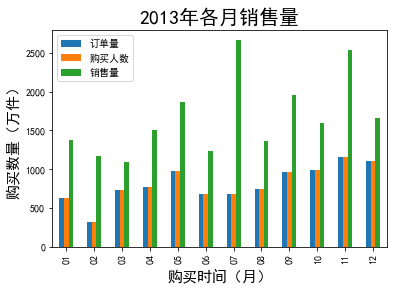

In [29]:
#2013年各月销售量
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
m_2013_sales.plot(kind='bar')
plt.title('2013年各月销售量', fontsize = 20)
plt.xlabel("购买时间（月）", fontsize = 15)
plt.ylabel("购买数量（万件）", fontsize = 15)

Text(0, 0.5, '购买数量（万件）')

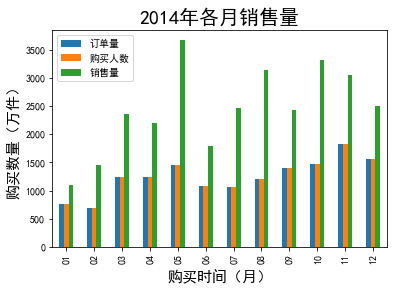

In [30]:
#2014年各月销售量
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
m_2014_sales.plot(kind='bar')
plt.title('2014年各月销售量', fontsize = 20)
plt.xlabel("购买时间（月）", fontsize = 15)
plt.ylabel("购买数量（万件）", fontsize = 15)

## （2）2013、2014各季度销售量统计

**构建2013、2014年各季度销售量统计表**

In [33]:
#m_sales_2013 2013的数据筛选

#2013各季度销售量统计表
a1=m_sales_2013.groupby("季度")["订单编号"].count()
b1=m_sales_2013.groupby("季度")["用户ID"].count()
c1=m_sales_2013.groupby("季度")["购买数量"].sum()
# a
q_2013_sales= pd.DataFrame()
q_2013_sales['订单量']=a1
q_2013_sales['购买人数']=b1
q_2013_sales['销售量']=c1
q_2013_sales


,订单量,购买人数,销售量
季度,,,
1,1685,1685,3643
2,2433,2433,4602
3,2390,2390,5982
4,3244,3244,5786


In [34]:
#2014各季度销售量统计表
a1=m_sales_2014.groupby("季度")["订单编号"].count()
b1=m_sales_2014.groupby("季度")["用户ID"].count()
c1=m_sales_2014.groupby("季度")["购买数量"].sum()
# a
q_2014_sales= pd.DataFrame()
q_2014_sales['订单量']=a1
q_2014_sales['购买人数']=b1
q_2014_sales['销售量']=c1
q_2014_sales

,订单量,购买人数,销售量
季度,,,
1,2705,2705,4926
2,3783,3783,7658
3,3671,3671,8037
4,4863,4863,8872


Text(0, 0.5, '购买数量（万件）')

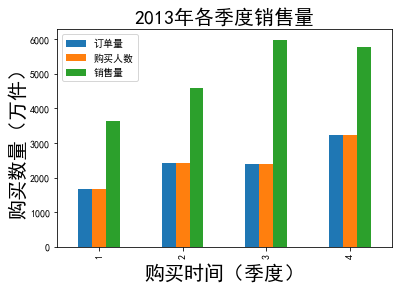

In [35]:
#2013年各季度销售量
q_2013_sales.plot(kind='bar')
plt.title('2013年各季度销售量', fontsize = 20)
plt.xlabel("购买时间（季度）", fontsize = 20)
plt.ylabel("购买数量（万件）", fontsize = 20)

Text(0, 0.5, '购买数量（万件）')

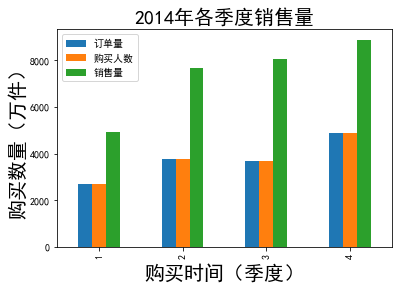

In [36]:
#2014年各季度销售量
q_2014_sales.plot(kind='bar')
plt.title('2014年各季度销售量', fontsize = 20)
plt.xlabel("购买时间（季度）", fontsize = 20)
plt.ylabel("购买数量（万件）", fontsize = 20)

## （3）大类市场占有率统计

**构建市场占有率统计表**

In [37]:
# df1
a=df1.groupby("根类别ID")["购买数量"].sum()
marketshare=pd.DataFrame()
marketshare['销售量']=a 
marketshare['市占率']=marketshare['销售量']/(marketshare['销售量'].sum())
marketshare

,销售量,市占率
根类别ID,,
28,24245,0.409530
38,3666,0.061924
50008168,16044,0.271004
50014815,9763,0.164910
50022520,3245,0.054812
122650008,2239,0.037820


In [38]:
# 计算百分比函数
def func(pct,allvals):
    absolute = int(pct/100 * np.sum(allvals))
    return '{:.2f}%\n{:d}'.format(pct, absolute)

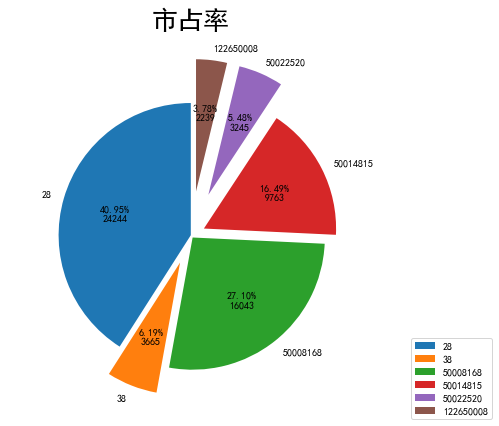

In [39]:
plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
labels=marketshare.index
values=np.array(marketshare['销售量'])
fig=plt.figure()
sub=fig.add_subplot(111)
sub.pie(values,labels=labels,labeldistance=1.1,startangle=90,explode=[0,0.2,0.02,0.1,0.3,0.3],autopct=lambda x:func(x,values),textprops=dict(fontsize=10),radius=0.9)
fig.suptitle('市占率',fontsize=26)
fig.tight_layout()
sub.legend()
plt.legend(bbox_to_anchor=(1.1,0), loc=3, borderaxespad=0)
plt.show()

#### 构建每季度大类销量统计表

In [40]:
#2013
a=m_sales_2013.groupby(["季度","根类别ID"])["购买数量"].sum()
# a
pb_2013_sales= pd.DataFrame()
pb_2013_sales['大类销售量']=a
pb_2013_sales


大类销售量
季度 根类别ID           
1  28          1726
   38           195
   50008168     762
   50014815     607
   50022520     205
   122650008    148
2  28          1571
   38           268
   50008168    1307
   50014815     763
   50022520     509
   122650008    184
3  28          2998
   38           342
   50008168    1501
   50014815     770
   50022520     246
   122650008    125
4  28          2122
   38           314
   50008168    1639
   50014815    1115
   50022520     307
   122650008    289

In [41]:
#2014
a=m_sales_2014.groupby(["季度","根类别ID"])["购买数量"].sum()
# a
pb_2014_sales= pd.DataFrame()
pb_2014_sales['大类销售量']=a
pb_2014_sales

大类销售量
季度 根类别ID           
1  28          2275
   38           320
   50008168    1108
   50014815     732
   50022520     291
   122650008    200
2  28          3100
   38           327
   50008168    2334
   50014815    1235
   50022520     365
   122650008    297
3  28          3478
   38           489
   50008168    2223
   50014815    1263
   50022520     350
   122650008    234
4  28          3558
   38           643
   50008168    2417
   50014815    1370
   50022520     454
   122650008    430

**绘制每季度大类销量柱形图**

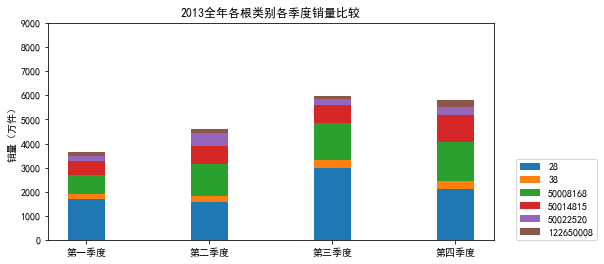

In [42]:

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['figure.figsize'] = [8,4]
if __name__ =='__main__':
    labels=['第一季度','第二季度','第三季度','第四季度']
    class_1=[1726,1571,2998,2122]
    class_2=[195,268,342,314]
    class_3=[762,1307,1501,1639]
    class_4=[607,763,770,1115]
    class_5=[205,509,246,307]
    class_6=[148,184,125,289]
    x=np.arange(len(labels))#设置柱状图显示位置
    width=0.3
    ax=plt.subplot()
    ax.bar(x,class_1,width,label='28')
    ax.bar(x,class_2,width,label='38',bottom=class_1)
    ax.bar(x,class_3,width,label='50008168',bottom=[class_1[i]+class_2[i] for i in x])
    ax.bar(x,class_4,width,label='50014815',bottom=[class_1[i]+class_2[i]+class_3[i] for i in x])
    ax.bar(x,class_5,width,label='50022520',bottom=[class_1[i]+class_2[i]+class_3[i] +class_4[i]  for i in x])
    ax.bar(x,class_6,width,label='122650008',bottom=[class_1[i]+class_2[i]+class_3[i] +class_4[i]+class_5[i] for i in x])
    ax.set_ylabel('销量（万件）')
    ax.set_title('2013全年各根类别各季度销量比较')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(0,9000)
    ax.legend()
    plt.legend(bbox_to_anchor=(1.05,0), loc=3, borderaxespad=0)
plt.show()

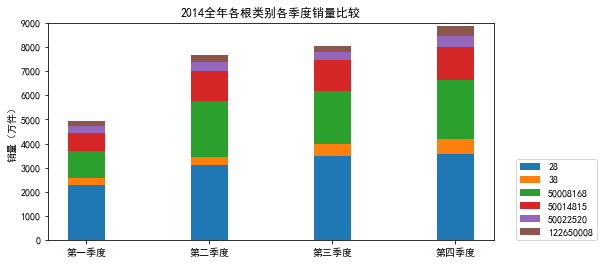

In [43]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['figure.figsize'] = [8,4]
if __name__ =='__main__':
    labels=['第一季度','第二季度','第三季度','第四季度']
    class_1=[2275,3100,3478,3558]
    class_2=[320,327,489,643]
    class_3=[1108,2334,2223,2417]
    class_4=[732,1235,1263,1370]
    class_5=[291,365,350,454]
    class_6=[200,297,234,430]
    x=np.arange(len(labels))#设置柱状图显示位置
    width=0.3
    ax=plt.subplot()
    ax.bar(x,class_1,width,label='28')
    ax.bar(x,class_2,width,label='38',bottom=class_1)
    ax.bar(x,class_3,width,label='50008168',bottom=[class_1[i]+class_2[i] for i in x])
    ax.bar(x,class_4,width,label='50014815',bottom=[class_1[i]+class_2[i]+class_3[i] for i in x])
    ax.bar(x,class_5,width,label='50022520',bottom=[class_1[i]+class_2[i]+class_3[i] +class_4[i]  for i in x])
    ax.bar(x,class_6,width,label='122650008',bottom=[class_1[i]+class_2[i]+class_3[i] +class_4[i]+class_5[i] for i in x])
    ax.set_ylabel('销量（万件）')
    ax.set_title('2014全年各根类别各季度销量比较')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(0,9000)
    ax.legend()
    plt.legend(bbox_to_anchor=(1.05,0), loc=3, borderaxespad=0)

## （4）不同性别销售量统计

In [44]:
#读取连接表
file_path='cleaned_data.csv'
df=pd.read_csv(file_path)
df

,用户ID,订单编号,商品ID,根类别ID,购买数量,时间戳,孩子出生日期,孩子性别,孩子年龄
0,513441334,19909384116,50010557,50008168,1,2012-12-12,2011-01-05,男,1.94
1,377550424,15771663914,50015841,28,1,2012-11-23,2011-06-20,男,1.43
2,47342027,14066344263,50013636,50008168,1,2012-09-11,2010-10-08,男,1.93
3,119784861,20796936076,50140021,50008168,1,2012-11-29,2012-03-27,女,0.68
4,159129426,15198386301,50013711,50008168,2,2012-08-08,2010-08-25,女,1.96
...,...,...,...,...,...,...,...,...,...
788,685332320,12781785338,50018831,50014815,2,2013-06-01,2012-02-23,女,1.27
789,389326420,17164967407,50006820,28,1,2014-09-16,2013-07-17,女,1.17
790,359840716,17513925908,50013207,50008168,1,2013-03-18,2009-01-20,女,4.16
791,1372572,16915013171,50008845,28,1,2013-03-27,2012-01-30,男,1.16


**描述性统计**

In [45]:
#性别分布
# df1['用户ID'].value_counts()
a=df.groupby("孩子性别")["订单编号"].count()
b=df.groupby("孩子性别")["用户ID"].count()
c=df.groupby("孩子性别")["购买数量"].sum()

sex_sales=pd.DataFrame()
sex_sales['订单量']=a
sex_sales['购买人数']=b
sex_sales['销售量']=c 
sex_sales

,订单量,购买人数,销售量
孩子性别,,,
女,426,426,817
男,367,367,449


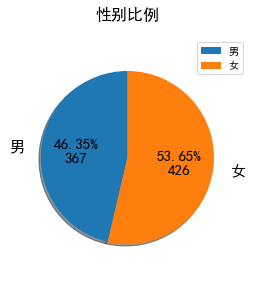

In [46]:
#性别比例
labels=['男','女']
values=np.array([368,426])
def func(pct,allvals):
    absolute = int(pct/100 * np.sum(allvals))
    return '{:.2f}%\n{:d}'.format(pct, absolute)
fig=plt.figure()
sub=fig.add_subplot(111)
sub.pie(values,labels=labels,labeldistance=1.2,startangle=90,autopct=lambda x:func(x,values),textprops=dict(fontsize=15),radius=0.9,shadow=True)
sub.legend()
fig.suptitle('性别比例',fontsize=16)
fig.tight_layout()
plt.show()

**构建各性别大类商品销售量统计表**

In [60]:
# df1['用户ID'].value_counts()
a=df.groupby(["孩子性别",'根类别ID'])["订单编号"].count()
b=df.groupby(["孩子性别",'根类别ID'])["用户ID"].count()
c=df.groupby(["孩子性别",'根类别ID'])["购买数量"].sum()

sex_sales_d=pd.DataFrame()
sex_sales_d['订单量']=a
sex_sales_d['购买人数']=b
sex_sales_d['销售量']=c 
sex_sales_d

订单量  购买人数  销售量
孩子性别 根类别ID                    
女    28          86    86  137
     38          24    24  103
     50008168   195   195  217
     50014815    80    80  317
     50022520    15    15   15
     122650008   26    26   28
男    28          85    85   98
     38          18    18   41
     50008168   162   162  183
     50014815    65    65   89
     50022520    14    14   15
     122650008   23    23   23

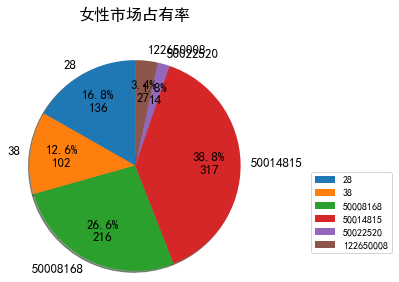

In [76]:
#女性市场占用率
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
labels=['28','38','50008168','50014815','50022520','122650008']
values=np.array([137,103,217,317,15,28])
def func(pct,allvals):
    absolute = int(pct/100 * np.sum(allvals))
    return '{:.1f}%\n{:d}'.format(pct, absolute)
fig=plt.figure()
sub=fig.add_subplot(111)
sub.pie(values,labels=labels,labeldistance=1.1,startangle=90,autopct=lambda x:func(x,values),textprops=dict(fontsize=13),radius=1.5,shadow=True)
fig.suptitle('女性市场占有率',fontsize=16)
fig.tight_layout()
sub.legend()
plt.legend(bbox_to_anchor=(1.5,0), loc=3, borderaxespad=0)
plt.show()

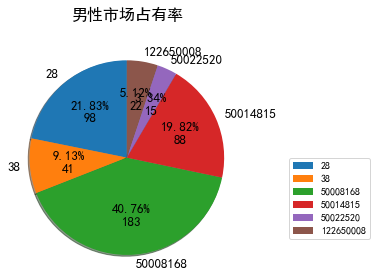

In [63]:
#男性市场占用率
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
labels=['28','38','50008168','50014815','50022520','122650008']
values=np.array([98,41,183,89,15,23])
def func(pct,allvals):
    absolute = int(pct/100 * np.sum(allvals))
    return '{:.2f}%\n{:d}'.format(pct, absolute)
fig=plt.figure()
sub=fig.add_subplot(111)
sub.pie(values,labels=labels,labeldistance=1.1,startangle=90,autopct=lambda x:func(x,values),textprops=dict(fontsize=13),radius=1.5,shadow=True)
fig.suptitle('男性市场占有率',fontsize=16)
fig.tight_layout()
plt.legend(bbox_to_anchor=(1.5,0), loc=3, borderaxespad=0)
plt.show()

## （5）不同年龄销售量统计

**构建各年龄大类商品销售量统计表**

In [64]:
from operator import itemgetter
df['时间戳']=pd.to_datetime(df['时间戳'].astype(str))
df['孩子出生日期']=pd.to_datetime(df['孩子出生日期'].astype(str))
df['孩子年龄']=(df['时间戳']-df['孩子出生日期'])//pd.Timedelta(days=365)

# df1['用户ID'].value_counts()
a=df.groupby(["孩子年龄",'根类别ID'])["订单编号"].count()
b=df.groupby(["孩子年龄",'根类别ID'])["用户ID"].count()
c=df.groupby(["孩子年龄",'根类别ID'])["购买数量"].sum()

age_sales_d=pd.DataFrame()
age_sales_d['订单量']=a
age_sales_d['购买人数']=b
age_sales_d['销售量']=c 
age_sales_d

订单量  购买人数  销售量
孩子年龄 根类别ID                    
0    28          48    48   85
     38          20    20   34
     50008168    96    96  102
     50014815    80    80  269
     50022520    18    18   19
     122650008    7     7    7
1    28          46    46   59
     38          16    16   81
     50008168    74    74   88
     50014815    35    35   78
     50022520     3     3    3
     122650008   16    16   17
2    28          22    22   28
     38           2     2    9
     50008168    69    69   72
     50014815    15    15   35
     50022520     5     5    5
     122650008    7     7    7
3    28          23    23   26
     38           2     2    7
     50008168    44    44   47
     50014815     9     9   12
     50022520     1     1    1
     122650008    7     7    7
4    28          18    18   23
     38           2     2   13
     50008168    25    25   28
     50014815     2     2    4
     50022520     2     2    2
     122650008    6     6    7
5    28           6     6    6
     50008168    24    24   33
     50014815     2     2    6
     122650008    3     3    3
6    28           3     3    3
     50008168    10    10   12
     50014815     1     1    1
     122650008    1     1    1
7    28           2     2    2
     50008168     9     9    9
     122650008    1     1    1
8    28           1     1    1
     50008168     3     3    6
     122650008    1     1    1
9    28           2     2    2
     50008168     1     1    1
10   50008168     1     1    1
     50014815     1     1    1
11   50008168     1     1    1

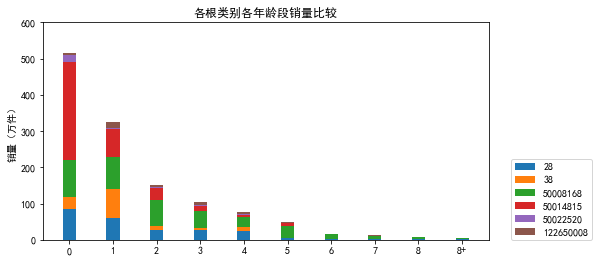

In [65]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
if __name__ =='__main__':
    labels=np.array(['0','1','2','3','4','5','6','7','8','8+'])
    class_1=np.array([85,59,28,26,23,6,3,2,1,2])
    class_2=np.array([34,81,9,7,13,0,0,0,0,0])
    class_3=np.array([102,88,72,47,28,33,12,9,6,3])
    class_4=np.array([269,78,35,12,4,6,1,0,0,1])
    class_5=np.array([19,3,1,5,2,0,0,0,0,0])
    class_6=np.array([7,17,7,7,7,3,1,1,1,0])
    x=np.arange(len(labels))#设置柱状图显示位置
    width=0.3
    ax=plt.subplot()
    ax.bar(x,class_1,width,label='28')
    ax.bar(x,class_2,width,label='38',bottom=class_1)
    ax.bar(x,class_3,width,label='50008168',bottom=[class_1[i]+class_2[i] for i in x])
    ax.bar(x,class_4,width,label='50014815',bottom=[class_1[i]+class_2[i]+class_3[i] for i in x])
    ax.bar(x,class_5,width,label='50022520',bottom=[class_1[i]+class_2[i]+class_3[i] +class_4[i]  for i in x])
    ax.bar(x,class_6,width,label='122650008',bottom=[class_1[i]+class_2[i]+class_3[i] +class_4[i]+class_5[i] for i in x])
    ax.set_ylabel('销量（万件）')
    ax.set_title('各根类别各年龄段销量比较')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(0,600)
    ax.legend()
    plt.legend(bbox_to_anchor=(1.05,0), loc=3, borderaxespad=0)
plt.show()

# 收获与心得

项目进行中我们小组遇到很多问题：
诸如   
- 数据预处理时对于异常值的判定与空缺值的处理
- 数据处理时对某项特征分组后采用聚集函数构建新的特征
- 数据分析时的中文乱码问题
- 数据挖掘时准确度较低等
通过此次项目，每个人都进一步深入地掌握了使用py库对大型数据集进行数据分析与挖掘的能力。      
最后以PPT的形式展现出来的同时，也意味着小组的每一个人都对数据科学的一般流程有了更深的了解。
    
同时，由于一开始对项目流程了解不够，造成模块之间耦合性较高，如数据分析与数据挖掘模块又分别进行了相应的数据处理等，是今后要提升的一个部分  
最后，由于本项目采取了公开数据集进行分析，并没有使用到数据搜集方面的知识与技能，同时这也是我们未来要深入学习的一个部分。